In [7]:
#Importing necessary libraries for generating recommendations and similar edges(copurchased items)

import string
import re
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem.porter import *
from stemming.porter2 import stem
import networkx
#import nltk
#nltk.download('stopwords')
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

#nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sayalipisal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# RECOMMENDATIONS

import networkx
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib as mpl

In [9]:
# Read the data from the amazon-books.txt to populate amazonProducts nested dictionary
# key = ASIN; 
# value = MetaData associated with ASIN

fhr = open('amazon-books.txt', 'r', encoding='utf-8', errors='ignore')
amazonBooks = {}
fhr.readline()
for line in fhr:
    cell = line.split('\t')
    MetaData = {}
    MetaData['Id'] = cell[0].strip()
    ASIN = cell[1].strip()
    MetaData['Title'] = cell[2].strip()
    MetaData['Categories'] = cell[3].strip()
    MetaData['Group'] = cell[4].strip()
    MetaData['Copurchased'] = cell[5].strip()
    MetaData['SalesRank'] = int(cell[6].strip())
    MetaData['TotalReviews'] = int(cell[7].strip())
    MetaData['AvgRating'] = float(cell[8].strip())
    MetaData['DegreeCentrality'] = int(cell[9].strip())
    MetaData['ClusteringCoeff'] = float(cell[10].strip())
    amazonBooks[ASIN] = MetaData
fhr.close()

In [10]:
# Read the data from amazon-books-copurchase.edgelist and assign it to copurchaseGraph weighted Graph;
# node = ASIN; 
# edge = copurchase 
# edge weight = category similarity

fhr = open("amazon-books-copurchase.edgelist", "rb")
copurchaseGraph = networkx.read_weighted_edgelist(fhr)
fhr.close()

In [12]:
# Recommendation done for a particular book 
print("Recommendations for Book with the ID:")
print("\n------------------------------------------------------------")
purchasedAsin = '0875421210'


Recommendations for Book with the ID:

------------------------------------------------------------


In [15]:
# Metadata associated with the book

print("ASIN = ", purchasedAsin)
print("Title = ", amazonBooks[purchasedAsin]['Title'])
print("SalesRank = ", amazonBooks[purchasedAsin]['SalesRank'])
print("TotalReviews = ", amazonBooks[purchasedAsin]['TotalReviews'])
print("AvgRating = ", amazonBooks[purchasedAsin]['AvgRating'])
print("DegreeCentrality = ", amazonBooks[purchasedAsin]['DegreeCentrality'])
print("ClusteringCoeff = ", amazonBooks[purchasedAsin]['ClusteringCoeff'])

ASIN =  0875421210
Title =  Earth Power: Techniques of Natural Magic (Llewellyn's Practical Magick)
SalesRank =  100261
TotalReviews =  47
AvgRating =  4.5
DegreeCentrality =  14
ClusteringCoeff =  0.67


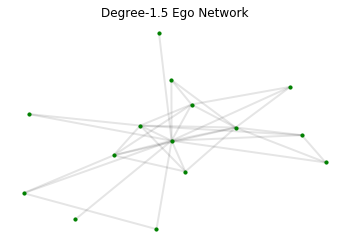

<Figure size 432x288 with 0 Axes>

In [16]:
# Implementing the depth-1 ego network of purchasedAsin from copurchaseGraph

n = purchasedAsin
ego = networkx.ego_graph(copurchaseGraph, n, radius=1.5)
purchasedAsinEgoGraph = networkx.Graph(ego)
pos = networkx.layout.spring_layout(purchasedAsinEgoGraph)
M = purchasedAsinEgoGraph.number_of_edges()
nodes = networkx.draw_networkx_nodes(purchasedAsinEgoGraph, pos, node_size=10, node_color='green')
edges = networkx.draw_networkx_edges(purchasedAsinEgoGraph, pos, node_size=10, edge_cmap=plt.cm.Blues, width=2, alpha=0.1)
ax = plt.gca()
ax.set_axis_off()
plt.title('Degree-1.5 Ego Network')
plt.figure(0)
plt.show()

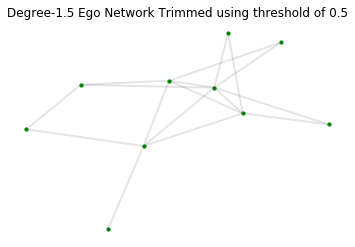

In [21]:
# Island method on purchasedAsinEgoGraph to retain edges with Threshold >= 0.5
threshold = 0.5
purchasedAsinEgoTrimGraph = networkx.Graph()
for f,t,e in purchasedAsinEgoGraph.edges(data=True):
    if e['weight'] >= threshold:
        purchasedAsinEgoTrimGraph.add_edge(f,t, weight=e['weight'])
pos = networkx.layout.spring_layout(purchasedAsinEgoTrimGraph)
M = purchasedAsinEgoTrimGraph.number_of_edges()
nodes = networkx.draw_networkx_nodes(purchasedAsinEgoTrimGraph, pos, node_size=10, node_color='green', label=True)
edges = networkx.draw_networkx_edges(purchasedAsinEgoTrimGraph, pos, node_size=10, edge_cmap=plt.cm.Blues, width=2, alpha=0.1)
ax = plt.gca()
ax.set_axis_off()
plt.title('Degree-1.5 Ego Network Trimmed using threshold of 0.5')
plt.figure(1)
plt.show()


In [22]:
# Get the list of nodes connected to the purchasedAsin
purchasedAsinNeighbours = purchasedAsinEgoTrimGraph.neighbors(purchasedAsin)

In [23]:
# Accessing metadata with ASIN in purchasedAsinNeighbours
AsMeta = []
for asin in purchasedAsinNeighbours:
    ASIN = asin
    Title = amazonBooks[asin]['Title']
    SalesRank = amazonBooks[asin]['SalesRank']
    TotalReviews = amazonBooks[asin]['TotalReviews']
    AvgRating = amazonBooks[asin]['AvgRating']
    DegreeCentrality = amazonBooks[asin]['DegreeCentrality']
    ClusteringCoeff = amazonBooks[asin]['ClusteringCoeff']
    AsMeta.append((ASIN, Title, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff))

In [24]:
# Sorting the top five nodes in purchasedAsinNeighbour by Average Rating then by TotalReviews
T5_byAvgRating_then_byTotalReviews = sorted(AsMeta, key=lambda x: (x[4], x[3]), reverse=True)[:5]

In [25]:
# Printing the Top 5 Recommendations
print('\nTop 5 Recommendations by AvgRating then by TotalReviews for Users Purchased the book:')
print('\n------------------------------------------------------------------------------------')
print('ASIN\t', 'Title\t', 'SalesRank\t', 'TotalReviews\t', 'AvgRating\t', 'DegreeCentrality\t', 'ClusteringCoeff')
for asin in T5_byAvgRating_then_byTotalReviews:
    print(asin)


Top 5 Recommendations by AvgRating then by TotalReviews for Users Purchased the book:

------------------------------------------------------------------------------------
ASIN	 Title	 SalesRank	 TotalReviews	 AvgRating	 DegreeCentrality	 ClusteringCoeff
('0875421229', "Cunningham's Encyclopedia of Magical Herbs (Llewellyn's Sourcebook Series)", 6565, 96, 4.5, 68, 0.65)
('0875421849', "Living Wicca: A Further Guide for the Solitary Practitioner (Llewellyn's Practical Magick)", 6003, 95, 4.5, 30, 0.81)
('0875421318', "Earth, Air, Fire, and Water: More Techniques of Natural Magic (Llewellyn's Practical Magick Series)", 7286, 57, 4.5, 10, 0.73)
('0875421261', "Cunningham's Encyclopedia of Crystal, Gem, and Metal Magic", 14867, 39, 4.0, 17, 0.54)
('0875421245', "The Magical Household: Spells & Rituals for the Home (Llewellyn's Practical Magick Series)", 111836, 21, 4.0, 8, 0.7)
